# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [69]:
import os
print(os.getcwd())

/Users/jasondixon/GA_DS_Class/GH_DS_SEA_4/DS-SEA-4/homework


In [70]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [71]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

In [72]:
# show the first review
data[0]

{u'business_id': u'9yKzy9PApeiPPOUJEtnvkg',
 u'date': u'2011-01-26',
 u'review_id': u'fWKvX83p0-ka4JS3dc6E5A',
 u'stars': 5,
 u'text': u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\

In [73]:
# convert the list of dictionaries to a DataFrame
yelp_js = pd.DataFrame.from_dict(data, orient='columns', dtype=None)

In [74]:
yelp_js.head(1)

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"


In [75]:
# add DataFrame columns for cool, useful, and funny
# Note: I couldn't find direct way to access dict values in a column
# This didn't work: yelp_js['funny'] = yelp_js['votes']['funny']
# So built it up this way:
# First, test syntax
yelp_js['votes'][0]['funny']

0

In [76]:
# Testing this syntax with another value
yelp_js['votes'][0]['useful']

5

In [77]:
# Testing syntax on random row 
# (to make sure it yields something different)
yelp_js['votes'][5]['useful']

3

In [78]:
# Try list comprehension to construct list of values for each vote type
funny_votes = [yelp_js['votes'][i]['funny'] for i in yelp_js['votes']]

In [79]:
# View first 10 entries in new list
print(funny_votes[:10])

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [80]:
# List comprehension didn't work so try again with a for loop
# First, find out how many rows we're dealing with
len(yelp_js.index.tolist())

10000

In [81]:
funny_votes = []
for i in range(len(yelp_js.index.tolist())):
    funny_votes.append(yelp_js['votes'][i]['funny'])
print(funny_votes[:10])

[0, 0, 0, 0, 0, 1, 4, 0, 0, 0]


In [82]:
# Verify length of list matches # of rows in DataFrame
len(funny_votes) == len(yelp_js.index.tolist())

True

In [83]:
# Set new column to values in funny votes list
yelp_js['Vote_Funny'] = funny_votes

In [84]:
# Confirm new column "Vote Funny" actually populated
yelp_js.head(10)

,business_id,date,review_id,stars,text,type,user_id,votes,Vote_Funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}",0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}",0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}",0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}",0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}",0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,"{u'funny': 1, u'useful': 3, u'cool': 4}",1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,"{u'funny': 4, u'useful': 7, u'cool': 7}",4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,"{u'funny': 0, u'useful': 1, u'cool': 0}",0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,"{u'funny': 0, u'useful': 0, u'cool': 0}",0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,"{u'funny': 0, u'useful': 1, u'cool': 0}",0


In [85]:
# Now create columns for 'useful' and 'cool' votes
useful_votes = []
for i in range(len(yelp_js.index.tolist())):
    useful_votes.append(yelp_js['votes'][i]['useful'])
yelp_js['Vote_Useful'] = useful_votes

cool_votes = []
for i in range(len(yelp_js.index.tolist())):
    cool_votes.append(yelp_js['votes'][i]['cool'])
yelp_js['Vote_Cool'] = cool_votes

In [86]:
# Confirm columns populated
yelp_js.head(10)

,business_id,date,review_id,stars,text,type,user_id,votes,Vote_Funny,Vote_Useful,Vote_Cool
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}",0,5,2
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}",0,2,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,"{u'funny': 1, u'useful': 3, u'cool': 4}",1,3,4
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,"{u'funny': 4, u'useful': 7, u'cool': 7}",4,7,7
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,1,0


In [87]:
# Drop the votes column and then display the head
# Test with new temporary variable before doing in-place
temp_yelp_js = yelp_js.drop('votes', axis=1)
temp_yelp_js.head()

,business_id,date,review_id,stars,text,type,user_id,Vote_Funny,Vote_Useful,Vote_Cool
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,0,5,2
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,0,2,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [88]:
# Now drop votes column in place
yelp_js.drop('votes', axis=1, inplace=True)
yelp_js.head(10)

,business_id,date,review_id,stars,text,type,user_id,Vote_Funny,Vote_Useful,Vote_Cool
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,0,5,2
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,0,2,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,1,3,4
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,4,7,7
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [51]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
# Update: Discarded this cell -- found way to use group by to get same data
# See next cell
one_star = yelp_js.loc[(yelp_js['stars'] == 1)]
two_star = yelp_js.loc[(yelp_js['stars'] == 2)]
three_star = yelp_js.loc[(yelp_js['stars'] == 3)]
four_star = yelp_js.loc[(yelp_js['stars'] == 4)]
five_star = yelp_js.loc[(yelp_js['stars'] == 5)]

In [89]:
yelp_js.groupby('stars')

In [90]:
# This doesn't seem to show the grouping.
yelp_js.groupby('stars').head()

,business_id,date,review_id,stars,text,type,user_id,Vote_Funny,Vote_Useful,Vote_Cool
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,0,5,2
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,0,2,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,1,3,4
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,4,7,7
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
13,WGNIYMeXPyoWav1APUq7jA,2011-12-23,FvEEw1_OsrYdvwLV5Hrliw,4,"Good tattoo shop. Clean space, multiple artist...",review,Xm8HXE1JHqscXe5BKf0GFQ,0,2,1


In [91]:
# Let's try assigning the grouping to a new variable.
star_group = yelp_js.groupby('stars')

In [93]:
star_group.head(10)

,business_id,date,review_id,stars,text,type,user_id,Vote_Funny,Vote_Useful,Vote_Cool
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,0,5,2
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,0,2,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,1,3,4
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,4,7,7
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [95]:
# It looks like you need to do some sort of action/calc on the grouping
yelp_js.groupby('stars').sum()

,Vote_Funny,Vote_Useful,Vote_Cool
stars,,,
1,791,1202,432
2,812,1449,667
3,1015,1909,1152
4,2364,4922,3366
5,2031,4611,3151


In [97]:
# Grouping yields another dataframe
type(yelp_js.groupby('stars').sum())

pandas.core.frame.DataFrame

In [98]:
# Assign grouping to variable for easier reference
group_vote_stars = yelp_js.groupby('stars').sum()

In [99]:
group_vote_stars.mean()

Vote_Funny     1402.6
Vote_Useful    2818.6
Vote_Cool      1753.6
dtype: float64

In [100]:
group_vote_stars.mean(axis=1)

stars
1     808.333333
2     976.000000
3    1358.666667
4    3550.666667
5    3264.333333
dtype: float64

I'm not sure how to obtain, for example, the average number of stars for the "Vote Funny" category. Or the average number of "Vote Funny" votes for one-star reviews, two-star reviews, etc.

Maybe what I'm looking for is a proportion instead of a mean -- for example, what percentage of one-star reviews were voted funny (among all star ratings for those voted funny as well as among all reviews)? I'm not sure how to find that with Pandas.

In [109]:
#Check totals
print("Total {} reviews: {}".format('Vote_Funny', yelp_js['Vote_Funny'].sum()))
print("Total {} reviews: {}".format('Vote_Useful', yelp_js['Vote_Useful'].sum()))
print("Total {} reviews: {}".format('Vote_Cool', yelp_js['Vote_Cool'].sum()))
print(yelp_js['Vote_Funny'].sum() + yelp_js['Vote_Useful'].sum() + yelp_js['Vote_Cool'].sum())

Total Vote_Funny reviews: 7013
Total Vote_Useful reviews: 14093
Total Vote_Cool reviews: 8768
29874


In [110]:
# Count number of rows in dataframe for each column
yelp_js.count()

business_id    10000
date           10000
review_id      10000
stars          10000
text           10000
type           10000
user_id        10000
Vote_Funny     10000
Vote_Useful    10000
Vote_Cool      10000
dtype: int64

The above two cells' calculations -- showing 29,874 votes when there are only 10,000 reviews -- reveals an important factor, namely that users can vote a review into more than one category.

Specifically, there are 7 possible categories:

* Funny
* Useful
* Cool
* Funny & Useful
* Funny & Cool
* Useful & Cool
* Funny & Useful & Cool

In [112]:
yelp_js.groupby('stars').mean()
# Users seem to find one-star reviews the funniest
# Users seem to find five-star reviews the coolest
# But the vote counts seems too low - an average of 1 or fewer votes in many cases?


,Vote_Funny,Vote_Useful,Vote_Cool
stars,,,
1,1.056075,1.604806,0.576769
2,0.875944,1.563107,0.719525
3,0.694730,1.306639,0.788501
4,0.670448,1.395916,0.954623
5,0.608631,1.381780,0.944261


In [57]:
# This returns same as above, so axis 0 must be default
yelp_js.groupby('stars', axis=0).mean()

,Vote_Funny,Vote_Useful,Vote_Cool
stars,,,
1,1.056075,1.604806,0.576769
2,0.875944,1.563107,0.719525
3,0.694730,1.306639,0.788501
4,0.670448,1.395916,0.954623
5,0.608631,1.381780,0.944261


In [111]:
# OK, it didn't like axis=1:
yelp_js.groupby('stars', axis=1).mean()

DataError: No numeric types to aggregate

I'm going to move on to the rest of the exercises, but the questions above are still outstanding.

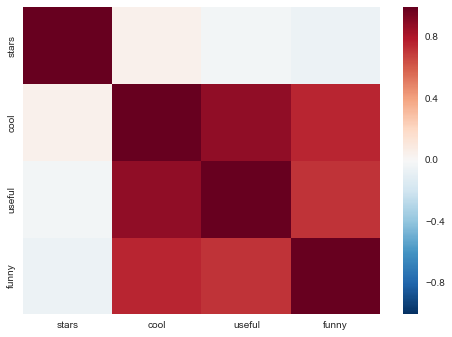

In [22]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr())

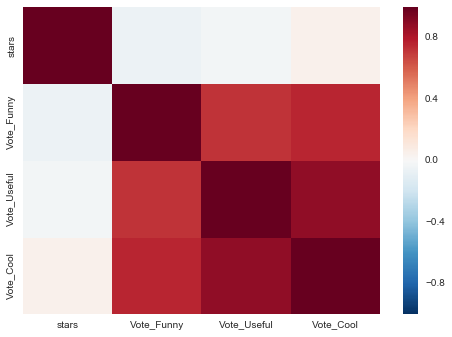

In [113]:
sns.heatmap(yelp_js.corr())

In [114]:
feature_cols = ['Vote_Funny', 'Vote_Useful', 'Vote_Cool']
X = yelp_js[feature_cols]
y = yelp_js['stars']
print("X Shape is {}".format(X.shape))
print("y Shape is {}".format(y.shape))

X Shape is (10000, 3)
y Shape is (10000,)


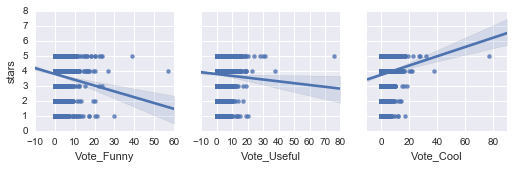

In [115]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
sns.pairplot(yelp_js, x_vars=feature_cols, y_vars='stars', kind='reg')

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [67]:
feature_cols = ['Vote_Funny', 'Vote_Useful', 'Vote_Cool']
X = yelp_js[feature_cols]
y = yelp_js['stars']
print("X Shape is {}".format(X.shape))
print("y Shape is {}".format(y.shape))

X Shape is (10000, 3)
y Shape is (10000,)


## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [65]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print(linreg.intercept_)
print(linreg.coef_)

3.83989479278
[-0.13567449 -0.14745239  0.27435947]


In [66]:
zip(feature_cols, linreg.coef_)

[('Vote_Funny', -0.13567449053707059),
 ('Vote_Useful', -0.14745239099401411),
 ('Vote_Cool', 0.27435946858853111)]

Interpretation of coefficients:
* All else equal, one additional vote of 'Funny' is associated with a rating decrease of of 0.14 stars.
* All else equal, one additional vote of 'Useful' is associated with a rating decrease of 0.15 stars.
* All else equal, one additional vote of 'Cool' is associated with an rating increase of 0.27 stars.

Evaluation fo coefficients (i.e., the "do they make sense question"):
* First, this exercise makes clear that we're talking about **association** and not **causation**, because the star rating (the response variable) comes before the voting of 'funny', 'useful', or'cool'.

* Second, the coefficients themselves don't really seem useful; they are not in useful units--there is no partial number of stars and the increase or decrease of the number of stars with which each vote is associated is very small.

* But maybe there is another way to interpret the findings. We could say that the lower the number of stars assigned in the review, the more likely it is that the Yelp community will consider the review both funny and useful. In particular with the association with "funny" votes, maybe users who had a bad experience try to write a funnier review than those who had a positive experience (some sort of gallows humor effect). The higher the rating, however, the more likely it is that the Yelp community will find the review "cool".

## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [121]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [122]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = yelp_js[feature_cols]
    y = yelp_js['stars']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [125]:
# calculate RMSE with all three features
print train_test_rmse(feature_cols)

1.17336862742


## Task 6

Try removing some of the features and see if the RMSE improves.

In [126]:
funny_useful_cols = ['Vote_Funny', 'Vote_Useful']
funny_cool_cols = ['Vote_Funny', 'Vote_Cool']
useful_cool_cols = ['Vote_Useful', 'Vote_Cool']

print train_test_rmse(funny_useful_cols)
print train_test_rmse(funny_cool_cols)
print train_test_rmse(useful_cool_cols)

1.20070113589
1.1851949299
1.18537944234


All combinations of voting categories seem to yield similar RMSE's; the original use of all three voting categories yielded the smallest error, however.

## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [28]:
# new feature: 

In [29]:
# new features: 


In [30]:
# add new features to the model and calculate RMSE


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [127]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())

In [128]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1.2019781029619465

The use of all three categories of voting together yields an error that is less than the null model. The use of "funny" and "useful" as the features yield a very similar error to the null model. However, all versions of the model tested yield very similar errors.